In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import fasttext

images_dir = '../teluguOCR/Dataset/Noised_Images/Image'
Labels_dir = "../teluguOCR/Dataset/strings.txt"
device = torch.device('cpu')

In [2]:
# load the txt file and read the file line by line.
def read_file_lines(filename):
    lines = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                lines.append(line.strip())  # Remove trailing newline characters
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
    return lines

In [3]:
print('క' + 'ా')

కా


In [4]:
acchulu = ['అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ౠ', 'ఌ', 'ౡ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'అం', 'అః']
hallulu = ['క', 'ఖ', 'గ', 'ఘ', 'ఙ',
           'చ', 'ఛ', 'జ', 'ఝ', 'ఞ',
           'ట', 'ఠ', 'డ', 'ఢ', 'ణ',
           'త', 'థ', 'ద', 'ధ', 'న',
           'ప', 'ఫ', 'బ', 'భ', 'మ',
           'య', 'ర', 'ల', 'వ', 'శ', 'ష', 'స', 'హ', 'ళ', 'క్ష', 'ఱ']
vallulu = ['ా', 'ి', 'ీ', 'ు' , 'ూ', 'ృ', 'ౄ', 'ె', 'ే', 'ై', 'ొ', 'ో', 'ౌ', 'ం', 'ః', 'ఁ', 'ౕ', 'ౖ', 'ౢ' ]
connector = ['్']
numbers = ['౦', '౧', '౨', '౩', '౪', '౫', '౬', '౭', '౮', '౯']
splcharacters= [' ', '!', '"', '#', '$', '%', '&', "'", '(', ')',
              '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[',
              '\\', ']', '^', '_', '`', '{', '|', '}', '~', '1','2', '3', '4', '5', '6', '7', '8', '9', '0', 'ఽ']
spl = splcharacters + numbers

bases = acchulu + hallulu + spl
vms = vallulu
cms = hallulu

print(len(bases), len(vms), len(cms))

108 19 36


In [5]:
print(len(bases))

108


In [6]:
acchulu = ['అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ౠ', 'ఌ', 'ౡ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'అం', 'అః']
hallulu = ['క', 'ఖ', 'గ', 'ఘ', 'ఙ',
           'చ', 'ఛ', 'జ', 'ఝ', 'ఞ',
           'ట', 'ఠ', 'డ', 'ఢ', 'ణ',
           'త', 'థ', 'ద', 'ధ', 'న',
           'ప', 'ఫ', 'బ', 'భ', 'మ',
           'య', 'ర', 'ల', 'వ', 'శ', 'ష', 'స', 'హ', 'ళ', 'క్ష', 'ఱ']
vallulu = ['ా', 'ి', 'ీ', 'ు' , 'ూ', 'ృ', 'ౄ', 'ె', 'ే', 'ై', 'ొ', 'ో', 'ౌ', 'ం', 'ః', 'ఁ', 'ౕ', 'ౖ', 'ౢ' ]
connector = ['్']
numbers = ['౦', '౧', '౨', '౩', '౪', '౫', '౬', '౭', '౮', '౯']
splcharacters= [' ', '!', '"', '#', '$', '%', '&', "'", '(', ')',
              '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[',
              '\\', ']', '^', '_', '`', '{', '|', '}', '~', '1','2', '3', '4', '5', '6', '7', '8', '9', '0', 'ఽ']
spl = splcharacters + numbers

bases = acchulu + hallulu + spl
vms = vallulu
cms = hallulu

print("Bases: ", len(bases))
print("Vms: ", len(vms))
print("Cms: ", len(cms))

characters = bases+vms+cms+connector

base_mapping = {}
i = 2
for x in bases:
  base_mapping[x] = i
  i+=1

vm_mapping = {}
i = 2
for x in vms:
  vm_mapping[x] = i
  i+=1

cm_mapping = {}
i = 2
for x in cms:
  cm_mapping[x] = i
  i+=1

  
# creates a list of ductionaries with each dictionary reporesenting a term
def wordsDicts(s):
  List = []
  for i in range(len(s)):
    x = s[i]
    prev = ''
    if i > 0: prev = s[i-1]
    #----------------------------------is it a base term-----------------------
    if((x in acchulu or x in hallulu)  and prev != connector[0]):
      List.append({})
      List[-1]['base'] = x
    #----------------------------if it is a consonant modifier-----------------
    elif x in hallulu and prev == connector[0]:
      if(len(List) == 0):
        print(x)
      if('cm' not in List[-1]): List[-1]['cm'] = []
      List[len(List)-1]['cm'].append(x)

      #---------------------------if it is a vowel modifier--------------------
    elif x in vallulu:
      if(len(List) == 0):
        print(x)

      if('vm' not in List[-1]): List[-1]['vm'] = []
      List[len(List)-1]['vm'].append(x)

      #----------------------------it is a spl character-----------------------
    elif x in spl:
      List.append({})
      List[len(List)-1]['base'] = x
    else:
      continue
  return List

# def one_hot_encoder(s):
#   List = wordsDicts(s)
#   onehot = []
#   for i in range(len(List)):
#     D = List[i]
#     onehotbase=  [0 for _ in range(len(acchulu) +  len(hallulu) + len(spl))]
#     onehotvm1 =  [0 for _ in range(len(vallulu))]
#     onehotvm2 =  [0 for _ in range(len(vallulu))]
#     onehotvm3 =  [0 for _ in range(len(vallulu))]
#     onehotvm4 =  [0 for _ in range(len(vallulu))]

#     onehotcm1 =  [0 for _ in range(len(hallulu))]   
#     onehotcm2 =  [0 for _ in range(len(hallulu))]   
#     onehotcm3 =  [0 for _ in range(len(hallulu))]   
#     onehotcm4 =  [0 for _ in range(len(hallulu))]   

#     onehotbase[base_mapping[D['base']]-1] = 1

#     it = 1
#     if('vm' in D):
#       for j in D['vm']:
#         if it == 1:
#           onehotvm1[vm_mapping[j]-1] = 1
#         elif it == 2:
#           onehotvm2[vm_mapping[j]-1] = 1
#         elif it == 3:
#           onehotvm3[vm_mapping[j]-1] = 1
#         elif it == 4:
#           onehotvm4[vm_mapping[j]-1] = 1
#         it += 1
    
#     it = 1
#     if('cm' in D):
#       for j in D['cm']:
#         if it == 1:
#           onehotcm1[cm_mapping[j]-1] = 1
#         elif it == 2:
#           onehotcm2[cm_mapping[j]-1] = 1
#         elif it == 3:
#           onehotcm3[cm_mapping[j]-1] = 1
#         elif it == 4:
#           onehotcm4[cm_mapping[j]-1] = 1
#         it += 1


#     onehoti = onehotbase + onehotvm1 + onehotvm2 + onehotvm3 + onehotvm4 + onehotcm1 + onehotcm2 + onehotcm3 + onehotcm4 #size 112 + 4*21 + 4*40 = 356
#     onehot.append(onehoti)
#   encoded = torch.tensor(onehot).float().to(device)
#   return encoded

# def One_Hot_Decoder(List):
#   x = ""
#   for onehoti in List:
#     for i in range(0, 112):
#       if onehoti[i] == 1:
#         x += bases[i]

#     for i in range(196, 236):
#       if onehoti[i] == 1:
#         x += connector[0]
#         x += cms[i-196]
#     for i in range(236, 276):
#       if onehoti[i] == 1:
#         x += connector[0]
#         x += cms[i-236]
#     for i in range(276, 316):
#       if onehoti[i] == 1:
#         x += connector[0]
#         x += cms[i-276]
#     for i in range(316, 356):
#       if onehoti[i] == 1:
#         x += connector[0]
#         x += cms[i-316]

#     for i in range(112, 133):
#       if onehoti[i] == 1:
#         x += vms[i-112]
#     for i in range(133, 154):
#       if onehoti[i] == 1:
#         x += vms[i-133]
#     for i in range(154, 175):
#       if onehoti[i] == 1:
#         x += vms[i-154]
#     for i in range(175, 196):
#       if onehoti[i] == 1:
#         x += vms[i-175]
#   return 

Bases:  108
Vms:  19
Cms:  36


In [7]:
def index_encoding(s):
  List = wordsDicts(s)
  onehot = []
  for i in range(len(List)):
    D = List[i]
    onehotbase=  [1]
    onehotvm1 =  [1]
    onehotvm2 =  [1]
    onehotvm3 =  [1]
    onehotvm4 =  [1]
    onehotcm1 =  [1]
    onehotcm2 =  [1]
    onehotcm3 =  [1]
    onehotcm4 =  [1]


    onehotbase[0] = base_mapping[D['base']]

    it = 1
    if('vm' in D):
      for j in D['vm']:
        if it == 1:
          onehotvm1[0] = vm_mapping[j]
        elif it == 2:
          onehotvm2[0] = vm_mapping[j]
        elif it == 3:
          onehotvm3[0] = vm_mapping[j]
        elif it == 4:
          onehotvm4[0] = vm_mapping[j]
        it += 1
    
    it = 1
    if('cm' in D):
      for j in D['cm']:
        if it == 1:
          onehotcm1[0] = cm_mapping[j]
        elif it == 2:
          onehotcm2[0] = cm_mapping[j]
        elif it == 3:
          onehotcm3[0] = cm_mapping[j]
        elif it == 4:
          onehotcm4[0] = cm_mapping[j]
        it += 1
    onehoti = onehotbase + onehotvm1 + onehotvm2 + onehotvm3 + onehotvm4 + onehotcm1 + onehotcm2 + onehotcm3 + onehotcm4 #size 110 + 4*21 + 4*38 = 346
    onehot.append(onehoti)
  return onehot

def index_decoder(List):
  x = ""
  for onehoti in List:
    if onehoti[0] > 1:
      x += bases[onehoti[0]-2]

    if onehoti[5] > 1:
      x += connector[0]
      x += cms[onehoti[5]-2]
    if onehoti[6] > 1:
      x += connector[0]
      x += cms[onehoti[6]-2]
    if onehoti[7] > 1:
      x += connector[0]
      x += cms[onehoti[7]-2]
    if onehoti[8] > 1:
      x += connector[0]
      x += cms[onehoti[8]-2]

    if onehoti[1] > 1:
      x += vms[onehoti[1]-2]
    if onehoti[2] > 1:
      x += vms[onehoti[2]-2]
    if onehoti[3] > 1:
      x += vms[onehoti[3]-2]
    if onehoti[4] > 1:
      x += vms[onehoti[4]-2]
  return x

In [8]:
s = "అందరికి శుభాకాంక్షలు"
encoded = index_encoding(s)
print(len(encoded))
print(len(encoded[0]))
index_decoder(encoded)

10
9


'అందరికి శుభాకాంక్షలు'

In [9]:
lengths = []

In [10]:
# batches = os.listdir("../teluguOCR/Dataset/batches/")
# number_of_images = 0

# num = 1
# for i in range(300):
#     batch = 'batch' + str(i)
#     if batch not in batches:
#         continue
#     print(num, " Done ", batch)
#     path = os.path.join("../teluguOCR/Dataset/batches/", batch)

#     image_paths = os.listdir(path + "/images")
#     if len(image_paths) == 0:
#         continue
#     image_sizes = []
#     for image_path in image_paths:
#         image = torch.load(path + "/images/" + image_path)
#         image_sizes.append(image.shape[2])
#     max_size = max(image_sizes)

#     # round off to next 100
#     max_size = (max_size // 100 + 1) * 100
    
#     # create a tensor of size (batch_size, 1, 30, max_size) and pad the images
#     batch_images = torch.zeros(len(image_paths), 30, max_size)
#     for i in range(len(image_paths)):
#         image = torch.load(path + "/images/image_" + str(i+1) + ".pt")
#         batch_images[i, :, :image.shape[2]] = image[0, :, :]
    
#     batch_images = batch_images.to(device)

#     # width = 15
#     # stride = 5
#     total_cropped_images = []
#     for i in range(batch_images.shape[0]):
#         # cropped_images = []
#         image = batch_images[i, :, :]
#         lengths.append(image.shape[1])
#         if image.shape[1] > 1200:
#             continue
#         img = Image.fromarray(image.numpy())
#         img = img.resize((image.shape[1], image.shape[0]//2))
#         image = torch.tensor(np.array(img))
#         f_image = torch.zeros(15, 1200)
#         f_image[:, :image.shape[1]] = image[:, :]
#         total_cropped_images.append(f_image)
#         number_of_images += 1
#     if len(total_cropped_images) == 0:
#         continue
#     total_cropped_images = torch.stack(total_cropped_images)
#     total_cropped_images = total_cropped_images.to(device)
#     torch.save(total_cropped_images, "/home/ocr/teluguOCR/Dataset/Batch_Image_Tensors/image_tesor"+str(num)+".pt")

#     # create a tensor for labels
#     labels = read_file_lines(path + "/label.txt")
#     encoded_labels = []
#     for label in labels:
#         encoded = torch.tensor(index_encoding(label)).to(device)
#         encoded_labels.append(encoded)
#     encoded_labels = torch.stack(encoded_labels)
#     torch.save(encoded_labels, "/home/ocr/teluguOCR/Dataset/Batch_Label_Tensors/label_tensor"+str(num)+".pt")

#     num += 1
    

In [11]:
# print(number_of_images)

checking batches

In [12]:
# print(max(lengths))

In [13]:
# #plotting the frequency of lengths
# plt.hist(lengths, bins=20)
# plt.show()


In [14]:
# greater_than_600 = 0
# less_than_600 = 0

# for l in lengths:
#     if l > 1000:
#         greater_than_600 += 1
#     else:
#         less_than_600 += 1

# print(greater_than_600)
# print(less_than_600)

In [15]:
import matplotlib.pyplot as plt

In [16]:
# image = torch.load("/home/ocr/teluguOCR/Dataset/batches/batch41/images/image_1.pt")

# plt.imshow(image[0, :, 2:20], cmap='gray')
# plt.show()

# batches_image = torch.zeros(1, 30, 1000)
# batches_image[0, :, :image.shape[2]-4] = image[0, :, 2:-2]
# batches_image = batches_image.to(device)
# width = 20
# stride = 10

# cropped_images = []
# for i in range(0, 1000-width, stride):
#     cropped_images.append(batches_image[:, :, i:i+width])
# cropped_images = torch.stack(cropped_images)

# plt.imshow(cropped_images[0, 0, :, :], cmap='gray')
# plt.show()

In [17]:
# import torch
# import matplotlib.pyplot as plt

# images = torch.load("/home/ocr/teluguOCR/Dataset/Batch_Image_Tensors/image_tesor45.pt")
# labels = torch.load("/home/ocr/teluguOCR/Dataset/Batch_Label_Tensors/label_tensor45.pt")

# print(images.shape)
# print(labels.shape)

# plt.figure(figsize=(5, 5))
# plt.imshow(images[0, :, 20:60], cmap='gray')
# plt.show()

# decoded = index_decoder(labels[0])
# print(decoded)

In [18]:
# for batch_num in range(1, 350):
    
#     Images_dir = "../teluguOCR/Dataset/batches/batch" + str(batch_num) + "/images/"
#     Labels_dir = "../teluguOCR/Dataset/batches/batch" + str(batch_num) + "/label.txt"
#     if(not os.path.exists(Images_dir)):
#         continue
#     labels = read_file_lines(Labels_dir)
#     lengths = [len(one_hot_encoder(i)) for i in labels]
#     print(batch_num, np.unique(lengths, return_counts=True))

In [19]:
# s = "ఉప త్వాగ్నే దివేదివే దోషావస్తర్ధియా వయం"
# print(len(one_hot_encoder(s)[0]))

In [20]:
image = torch.load("../teluguOCR/Dataset/Noised_Images/Image1.pt")
print(image.shape)

torch.Size([30, 376])


In [21]:
# batches_list = os.listdir("../teluguOCR/Dataset/batches/")
# ind = 1
# for batch in batches_list:
#     print(ind)
#     # for labels
#     labels = read_file_lines("../teluguOCR/Dataset/batches/" + batch + "/label.txt")
#     length = len(wordsDicts(labels[0]))
#     batch_label_torch = torch.zeros(len(labels), length+2, 358)
#     indx = 0
#     for label in labels:
#         encoded = one_hot_encoder(label)
#         batch_label_torch[indx] = encoded
#         indx += 1
#     torch.save(batch_label_torch, "/home/ocr/teluguOCR/Dataset/Batch_Label_Tensors/Label" + str(ind) + ".pt")

#     # for images
#     images_list = os.listdir("../teluguOCR/Dataset/batches/" + batch + "/images/")
#     batch_image_torch = torch.zeros(len(images_list), 1, 30, 500)
#     indx = 0
#     for image in images_list:
#         IMG = torch.load("../teluguOCR/Dataset/batches/" + batch + "/images/" + image)
#         IMG[IMG > 1] = 1
#         IMG[IMG < 0] = 0
#         IMG= np.round(IMG*255)
#         batch_image_torch[indx] = IMG
#         indx += 1
#     torch.save(batch_image_torch, "/home/ocr/teluguOCR/Dataset/Batch_Image_Tensors/Image" + str(ind) + ".pt")
#     print("Batch " + str(ind) + " done")
#     ind += 1

In [22]:
import torch

Images = []
Labels = []

label_lengths = []

number_of_data_points = 0

max_image_length = 0
max_label_length = 0

num = 1

lines = read_file_lines("../teluguOCR/Dataset/strings.txt")
for i in range(30000):
    full_label = torch.ones(42, 9)
    image = torch.load("/home/ocr/teluguOCR/Dataset/Noised_Images/Image" + str(i+1) + ".pt")


    label = index_encoding(lines[i])
    label = torch.tensor(label)

    if image.shape[1] > 800 or label.shape[0] > 45:
        continue

    
    full_image = torch.zeros(30, 800)
    full_image[:, :image.shape[1]] = 255 - image[:, :]
    image = full_image

    img = Image.fromarray(image.numpy())
    img = img.resize((800, 40))
    image = torch.tensor(np.array(img))

    label_lengths.append(label.shape[0])

    max_image_length = max(max_image_length, image.shape[1])
    max_label_length = max(max_label_length, label.shape[0])

    Images.append(image.unsqueeze(0))
    
    full_label[:label.shape[0], :] = label[:, :]

    Labels.append(full_label)
    number_of_data_points += 1

    if len(Images) == 100:
        Images = torch.stack(Images)
        Labels = torch.stack(Labels)
        labels_lengths = torch.tensor(label_lengths)
        torch.save(Images, "/home/ocr/teluguOCR/Dataset/Full_Image_Tensors/Full_Image_Tensors"+ str(num) +".pt")
        torch.save(Labels, "/home/ocr/teluguOCR/Dataset/Full_Label_Tensors/Full_Label_Tensors" + str(num) + ".pt")
        torch.save(labels_lengths, "/home/ocr/teluguOCR/Dataset/Full_label_length_tensors/Full_Label_Lengths" + str(num) + ".pt")
        print(torch.max(Images), torch.min(Images))
        print(100*num , " | to | ", 100*(num+1), " done")
        Images = []
        Labels = []
        label_lengths = []
        num += 1

if len(Images) != 0:
    Images = torch.stack(Images)
    Labels = torch.stack(Labels)
    labels_lengths = torch.tensor(label_lengths)
    torch.save(Images, "/home/ocr/teluguOCR/Dataset/Full_Image_Tensors/Full_Image_Tensors"+ str(num) +".pt")
    torch.save(Labels, "/home/ocr/teluguOCR/Dataset/Full_Label_Tensors/Full_Label_Tensors" + str(num) + ".pt")
    torch.save(labels_lengths, "/home/ocr/teluguOCR/Dataset/Full_label_length_tensors/Full_Label_Lengths" + str(num) + ".pt")
    print(torch.max(Images), torch.min(Images))
    print(100*num , " | to | ", 100*(num+1), " done")

# Images = torch.stack(Images)
# Labels = torch.stack(Labels)
# labels_lengths = torch.tensor(label_lengths)

print(Images.shape)
print(Labels.shape)
print(labels_lengths.shape)

print("max_image_length: ", max_image_length)
print("max_label_length: ", max_label_length)

tensor(283.7862) tensor(-27.4874)
100  | to |  200  done
tensor(284.0304) tensor(-28.4516)
200  | to |  300  done
tensor(284.8828) tensor(-29.8828)
300  | to |  400  done
tensor(283.0663) tensor(-29.4051)
400  | to |  500  done
tensor(284.8828) tensor(-29.8828)
500  | to |  600  done
tensor(282.8879) tensor(-29.8828)
600  | to |  700  done
tensor(283.1143) tensor(-28.8988)
700  | to |  800  done
tensor(282.8919) tensor(-29.2509)
800  | to |  900  done
tensor(282.7444) tensor(-28.6395)
900  | to |  1000  done
tensor(281.4941) tensor(-27.8770)
1000  | to |  1100  done
tensor(283.5416) tensor(-27.8075)
1100  | to |  1200  done
tensor(283.9697) tensor(-28.5516)
1200  | to |  1300  done
tensor(284.0984) tensor(-28.3269)
1300  | to |  1400  done
tensor(284.4112) tensor(-28.2454)
1400  | to |  1500  done
tensor(283.3795) tensor(-29.8828)
1500  | to |  1600  done
tensor(284.8828) tensor(-28.5620)
1600  | to |  1700  done
tensor(283.4591) tensor(-29.5077)
1700  | to |  1800  done
tensor(283.795

In [23]:
print(number_of_data_points)

21860


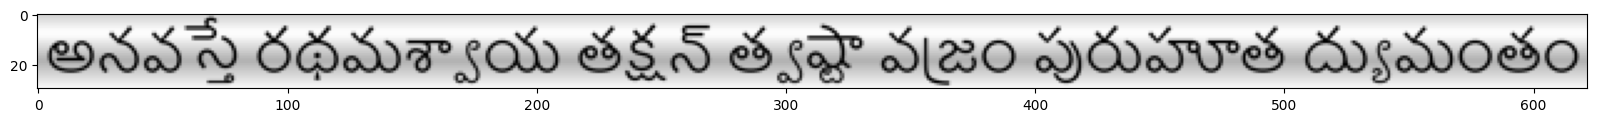

In [24]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Images = torch.load("/home/ocr/teluguOCR/Dataset/Noised_Images/Image300.pt")

plt.figure(figsize=(20, 20))
plt.imshow(Images, cmap='gray', vmin=0, vmax=255)
plt.show()

# full = torch.zeros(30, 1200)
# full[:, :Images.shape[2]] = Images

# print(full.shape)

# img = Image.fromarray(full.numpy())

# img = img.resize((500, 10))
# full = torch.tensor(np.array(img))
# print(full.shape)

# plt.figure(figsize=(20, 20))
# plt.imshow(full[:, :], cmap='gray', vmin=0, vmax=255)
# plt.show()

# lengths = []

# for i in range(1, 30001):
#     image = torch.load("/home/ocr/teluguOCR/Dataset/Noised_Images/Image" + str(i) + ".pt")
#     # if image.shape[2] > 1200:
#     #     continue
#     lengths.append(image.shape[2])

In [25]:
labels = read_file_lines("../teluguOCR/Dataset/strings.txt")
lebel_lengths = torch.load("../teluguOCR/Dataset/Full_label_length_tensors/Full_Label_Lengths1.pt")

for i in range(100):
    # print(i," | ", labels[i])
    List = wordsDicts(labels[i])
    print(len(List) == lebel_lengths[i])

tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)

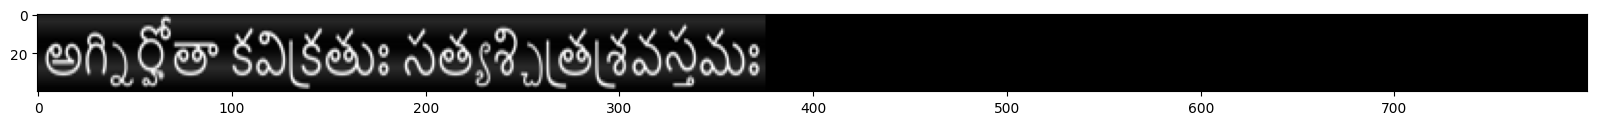

tensor(0.)
tensor(29.4097)


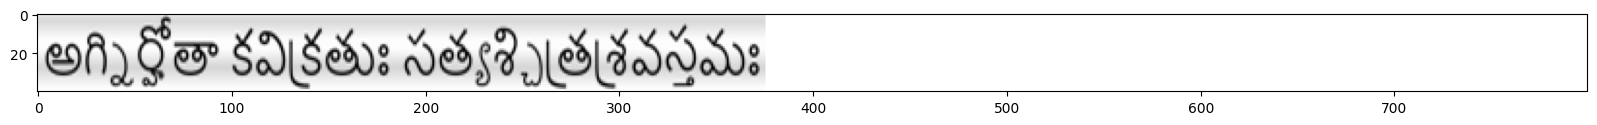

In [26]:
import torch
import matplotlib.pyplot as plt

Images = torch.load("/home/ocr/teluguOCR/Dataset/Full_Image_Tensors/Full_Image_Tensors1.pt")
plt.figure(figsize=(20, 20))
plt.imshow(Images[0][0], cmap='gray', vmin=0, vmax=255)
plt.show()

print(Images[0][0][-1][-1])
print(Images[0][0][1][1])

plt.figure(figsize=(20, 20))
plt.imshow(255-Images[0][0], cmap='gray', vmin=0, vmax=255)
plt.show()

tensor([255], dtype=torch.uint8)
tensor([0.])


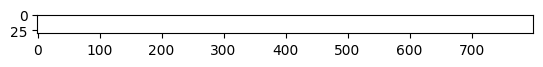

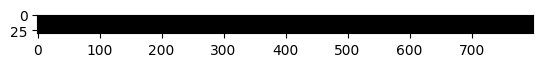

In [27]:
import torch
import matplotlib.pyplot as plt

# white image tensor
im_white = torch.zeros(30, 800).to(torch.uint8)
im_white += 255

print(torch.unique(im_white))
# black image tensor
im_black = torch.zeros(30, 800)
print(torch.unique(im_black))

plt.imshow(im_white, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(im_black, cmap='gray', vmin=0, vmax=255)
plt.show()

In [28]:
import torch

labels = torch.load("/home/ocr/teluguOCR/Dataset/Full_Label_Tensors/Full_Label_Tensors1.pt")
print(torch.max(labels[:, :, 5]))
print(torch.min(labels[:, :, 5]))

tensor(34.)
tensor(1.)
